# MLP - MNIST **DATASET**

In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

## Adding Batch Normalization and Dropout to our Neural Network which consist of 5 hidden layers

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [7]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model = Sequential()
model.add(Dense(630, input_shape = (input_dim,), activation = 'sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(510, activation = 'sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(390, activation = 'sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(210, activation = 'sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(110, activation = 'sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

W0817 11:21:43.904909 140225311647616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 11:21:43.954204 140225311647616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 11:21:43.962996 140225311647616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 11:21:44.220430 140225311647616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0817 11:21:44.249758 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 630)               494550    
_________________________________________________________________
batch_normalization_1 (Batch (None, 630)               2520      
_________________________________________________________________
dropout_1 (Dropout)          (None, 630)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 510)               321810    
_________________________________________________________________
batch_normalization_2 (Batch (None, 510)               2040      
_________________________________________________________________
dropout_2 (Dropout)          (None, 510)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 390)               199290    
__________

In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

W0817 11:21:48.818568 140225311647616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0817 11:21:48.855422 140225311647616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = 30, verbose = 1, validation_data = (X_test, Y_test))

W0817 11:21:53.543481 140225311647616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 23s 377us/step - loss: 0.6808 - acc: 0.7947 - val_loss: 0.2931 - val_acc: 0.9184
Epoch 2/30
60000/60000 [==============================] - 20s 337us/step - loss: 0.3940 - acc: 0.8846 - val_loss: 0.2274 - val_acc: 0.9371
Epoch 3/30
60000/60000 [==============================] - 20s 335us/step - loss: 0.3304 - acc: 0.9041 - val_loss: 0.2017 - val_acc: 0.9427
Epoch 4/30
60000/60000 [==============================] - 20s 334us/step - loss: 0.2892 - acc: 0.9178 - val_loss: 0.2041 - val_acc: 0.9413
Epoch 5/30
60000/60000 [==============================] - 20s 334us/step - loss: 0.2612 - acc: 0.9254 - val_loss: 0.1608 - val_acc: 0.9561
Epoch 6/30
60000/60000 [==============================] - 20s 332us/step - loss: 0.2353 - acc: 0.9335 - val_loss: 0.1467 - val_acc: 0.9594
Epoch 7/30
60000/60000 [==============================] - 20s 335us/step - loss: 0.2145 - acc: 0.9392 - val_loss: 0.

## Evaluating the Test accuracy and plotting for Train Loss and Validation Loss

Test accuracy : 0.9831


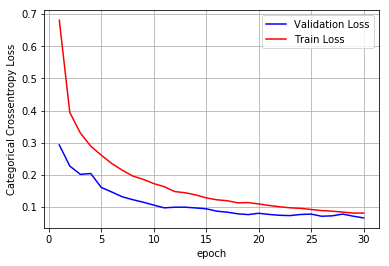

In [16]:

score = model.evaluate(X_test, Y_test, verbose=0)
print("Test accuracy : "+str(score[1]))

%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,30+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)